In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lets create synthetic data points
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [3]:
pd.DataFrame(X)[0]

0     -1.054802
1      0.033061
2     -0.124268
3      1.013587
4      1.213558
         ...   
995    0.042779
996    2.157384
997   -0.070159
998    0.185418
999   -2.053941
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

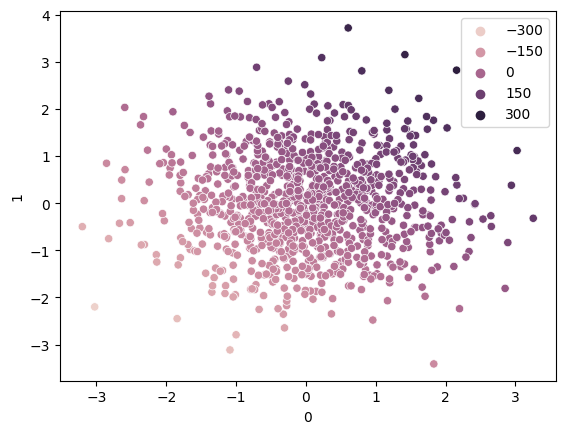

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [9]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr.coef_

array([[56.77235132, 62.07140038]])

In [11]:
# Prediction
y_pred = svr.predict(X_test)
y_pred

array([ 159.83099329,   71.62235301,    8.61388693,  -16.38108747,
        -10.11611963,   12.46466186,   96.20409027,  -32.67249439,
        -74.91023371,   60.12989247,   -1.7498957 ,  -60.87168667,
        -99.10675516,   47.95914092,   44.87628361,  -86.85128125,
        152.60536737,  -65.97543391,   68.03195683,  -38.74550322,
        -11.07673878,   59.2492933 ,   11.87717533, -119.07056708,
       -153.16299346,   47.35304306,   71.55484213,  -31.21767676,
        125.24381184, -124.8992123 ,   83.86686806,    9.06633279,
        101.09965107,  -45.42766979, -126.39135707,   -8.61459297,
        265.24252142,   63.88049185,  108.5107714 ,  -53.58740125,
         -6.36415038,   69.31035852,  131.57040929,   19.89606377,
         49.36705915,  -23.77506541, -109.798534  ,  151.27239251,
       -156.3098046 ,   63.85034524,  124.89839455,   30.0670697 ,
        -55.26559357,  162.39479492, -185.67554527,    4.47118221,
        -56.82117717,   96.6372676 ,   -6.32102583,   38.10810

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9987310077451591


In [17]:
# Hyperparameter Tuning with SVR
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
              }

grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.817 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.815 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.817 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.815 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [19]:
# Prediction
y_pred_ = grid.predict(X_test)
print(r2_score(y_test, y_pred_))

0.9987787614964926
